<a href="https://colab.research.google.com/github/K-Saritha/ML-LAB/blob/main/week_8_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data=pd.read_csv("/content/diabetes - diabetes.csv")

In [ ]:
X=data.iloc[:,:8]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=200)

In [ ]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_nearest_indices]
        # Predict the label based on the majority class among the k-nearest neighbors
        pred_label = Counter(k_nearest_labels).most_common(1)[0][0]
        y_pred.append(pred_label)
    return np.array(y_pred)

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def confusion_matrix_manual(y_true, y_pred):
    # Get unique class labels
    classes = np.unique(np.concatenate((y_true, y_pred)))
    num_classes = len(classes)

    # Create confusion matrix with correct dimensions
    cm = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(len(y_true)):
        # Get indices of true and predicted labels in classes array
        true_idx = np.where(classes == y_true[i])[0][0]
        pred_idx = np.where(classes == y_pred[i])[0][0]

        # Increment the count in the confusion matrix
        cm[true_idx, pred_idx] += 1

    return cm

# Assuming X_train, y_train, X_test, y_test are already defined
k_values = [3, 5, 7, 9, 11]
accuracies = []

for k in k_values:
    y_pred = predict(X_train.values, y_train.values, X_test.values, k)
    acc = accuracy(y_test, y_pred)
    accuracies.append(acc)
    cm = confusion_matrix_manual(y_test.values, y_pred) # Pass y_test.values
    print(f"Confusion Matrix for k={k}:\n{cm}\n")
    print(f"Accuracy for k={k}: {acc}")

Confusion Matrix for k=3:
[[119  40]
 [ 25  47]]

Accuracy for k=3: 0.7186147186147186
Confusion Matrix for k=5:
[[121  38]
 [ 24  48]]

Accuracy for k=5: 0.7316017316017316
Confusion Matrix for k=7:
[[128  31]
 [ 26  46]]

Accuracy for k=7: 0.7532467532467533
Confusion Matrix for k=9:
[[128  31]
 [ 26  46]]

Accuracy for k=9: 0.7532467532467533
Confusion Matrix for k=11:
[[129  30]
 [ 28  44]]

Accuracy for k=11: 0.7489177489177489


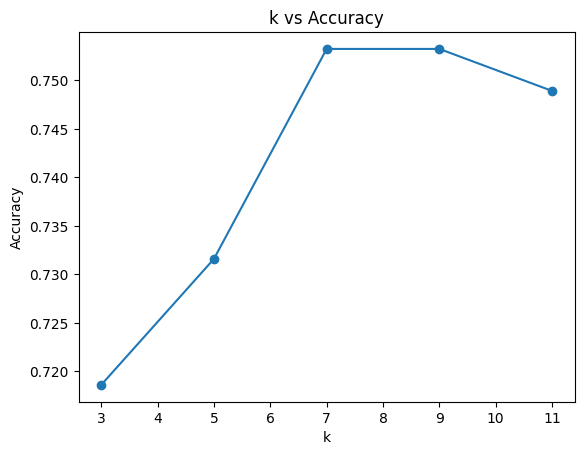

In [ ]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.show()